# Modellierung

## eda - für die observation_based Daten

spz_Wasserstand_analyse\data\wasserstand\camels_ch\timeseries\observation_based

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

### Andermatt

| Column Name              | Bedeutung                                                                                               |
|--------------------------|---------------------------------------------------------------------------------------------------------|
| date                     | Datum der Messung.                                                                     |
| discharge_vol (m³/s)     | Gemessener Abfluss (Volumen) des Gewässers in Kubikmeter pro Sekunde.                                  |
| discharge_spec (mm/d)    | Spezifischer Abfluss in Millimeter pro Tag – normierter Abfluss bezogen auf die Fläche des Einzugsgebiets. |
| waterlevel (m)           | Wasserstand im Gewässer in Metern.                                                                     |
| precipitation (mm/d)     | Gemessene Niederschlagsmenge in Millimeter pro Tag.                                                    |
| temperature_min (°C)     | Gemessene minimale Lufttemperatur in Grad Celsius.                                                     |
| temperature_mean (°C)    | Gemessene durchschnittliche Lufttemperatur in Grad Celsius.                                            |
| temperature_max (°C)     | Gemessene maximale Lufttemperatur in Grad Celsius.                                                     |
| rel_sun_dur (%)          | Relative Sonnenscheindauer in Prozent, Verhältnis zur möglichen Sonnenscheindauer.                     |
| swe (mm)                 | Schnee-Wasser-Äquivalent in Millimeter – misst die Wassermenge im Schnee.                              |


In [2]:
df_observation_andermatt = pd.read_csv('../data/wasserstand/camels_ch/timeseries/observation_based/CAMELS_CH_obs_based_2087.csv')

# 'date'-Spalte in datetime-Format umwandeln
df_observation_andermatt['date'] = pd.to_datetime(df_observation_andermatt['date'])

# Als Index setzen
df_observation_andermatt.set_index('date', inplace=True)


df_observation_andermatt

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1981-01-01,1.960,0.890,1426.559,7.96,-13.14,-7.66,-1.06,5.17,NaN
1981-01-02,1.763,0.801,1426.546,11.66,-13.26,-10.12,-3.96,0.44,NaN
1981-01-03,1.827,0.830,1426.550,33.11,-8.13,-3.90,-0.99,25.89,NaN
1981-01-04,1.837,0.835,1426.550,40.16,-13.63,-7.57,-4.23,0.05,NaN
1981-01-05,1.771,0.805,1426.546,12.72,-15.26,-14.08,-13.03,0.04,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


In [3]:
# Übersicht, Kontrolle
print(df_observation_andermatt.info())
print(r'*****')
print(df_observation_andermatt.head())
print(r'*****')
print(df_observation_andermatt.describe())


# Fehltage analysieren
df_observation_andermatt.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1981-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   discharge_vol(m3/s)     14610 non-null  float64
 1   discharge_spec(mm/d)    14610 non-null  float64
 2   waterlevel(m)           14610 non-null  float64
 3   precipitation(mm/d)     14610 non-null  float64
 4   temperature_min(degC)   14610 non-null  float64
 5   temperature_mean(degC)  14610 non-null  float64
 6   temperature_max(degC)   14610 non-null  float64
 7   rel_sun_dur(%)          14610 non-null  float64
 8   swe(mm)                 8157 non-null   float64
dtypes: float64(9)
memory usage: 1.1 MB
None
*****
            discharge_vol(m3/s)  discharge_spec(mm/d)  waterlevel(m)  \
date                                                                   
1981-01-01                1.960                 0.890       1426.559   
1981-01-02               

discharge_vol(m3/s)          0
discharge_spec(mm/d)         0
waterlevel(m)                0
precipitation(mm/d)          0
temperature_min(degC)        0
temperature_mean(degC)       0
temperature_max(degC)        0
rel_sun_dur(%)               0
swe(mm)                   6453
dtype: int64

### Korrelation


In [4]:
# Korelation mit waterlevel(m)
corr = df_observation_andermatt.corr(numeric_only=True)
corr['waterlevel(m)'].sort_values(ascending=False)

waterlevel(m)             1.000000
discharge_spec(mm/d)      0.929226
discharge_vol(m3/s)       0.929226
temperature_min(degC)     0.583711
temperature_mean(degC)    0.576789
temperature_max(degC)     0.561642
precipitation(mm/d)       0.202508
swe(mm)                  -0.085142
rel_sun_dur(%)           -0.110789
Name: waterlevel(m), dtype: float64

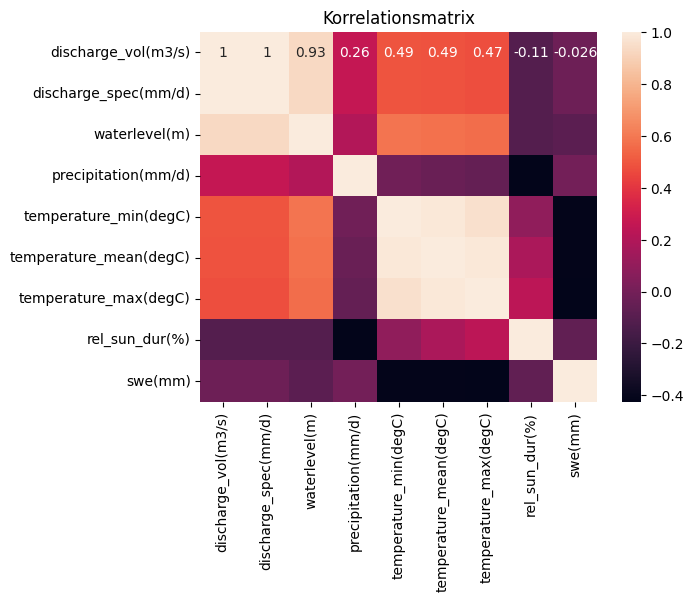

In [5]:
# Korrellationsmatrix
sns.heatmap(df_observation_andermatt.corr(), annot=True)
plt.title('Korrelationsmatrix')
plt.show()

Gemäss den oben genannten Informationen behalten wir nur die Koeffizienten `discharge_vol` und `temperature_mean` bei.


In [6]:
# prüfen, gleich viele Obervatoinen wie zwischen 01.01.1981 und 31.12.2018 zu erwarten sind
start_date = datetime(1981, 1, 1)
end_date = datetime(2020, 12, 31)

delta = end_date - start_date
print(delta.days+1)

df_observation_andermatt.shape


df_observation_andermatt

14610


,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1981-01-01,1.960,0.890,1426.559,7.96,-13.14,-7.66,-1.06,5.17,NaN
1981-01-02,1.763,0.801,1426.546,11.66,-13.26,-10.12,-3.96,0.44,NaN
1981-01-03,1.827,0.830,1426.550,33.11,-8.13,-3.90,-0.99,25.89,NaN
1981-01-04,1.837,0.835,1426.550,40.16,-13.63,-7.57,-4.23,0.05,NaN
1981-01-05,1.771,0.805,1426.546,12.72,-15.26,-14.08,-13.03,0.04,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


In [7]:
swe = df_observation_andermatt[df_observation_andermatt['swe(mm)'].notna()]
swe

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1998-09-02,4.863,2.209,1426.807,0.08,6.86,10.37,15.08,39.10,0.0
1998-09-03,6.278,2.852,1426.855,17.01,6.08,8.47,12.29,25.30,0.0
1998-09-04,5.020,2.281,1426.814,37.83,4.72,8.19,12.63,43.10,0.0
1998-09-05,15.947,7.245,1427.069,13.04,1.68,4.07,7.50,6.04,0.0
1998-09-06,6.222,2.827,1426.857,0.00,1.37,5.56,10.73,86.75,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


-  bei `swe(mm)` haben wir missing values
- `swe(mm)` gibt es Daten von 1998-09-02 - 2020-12-31

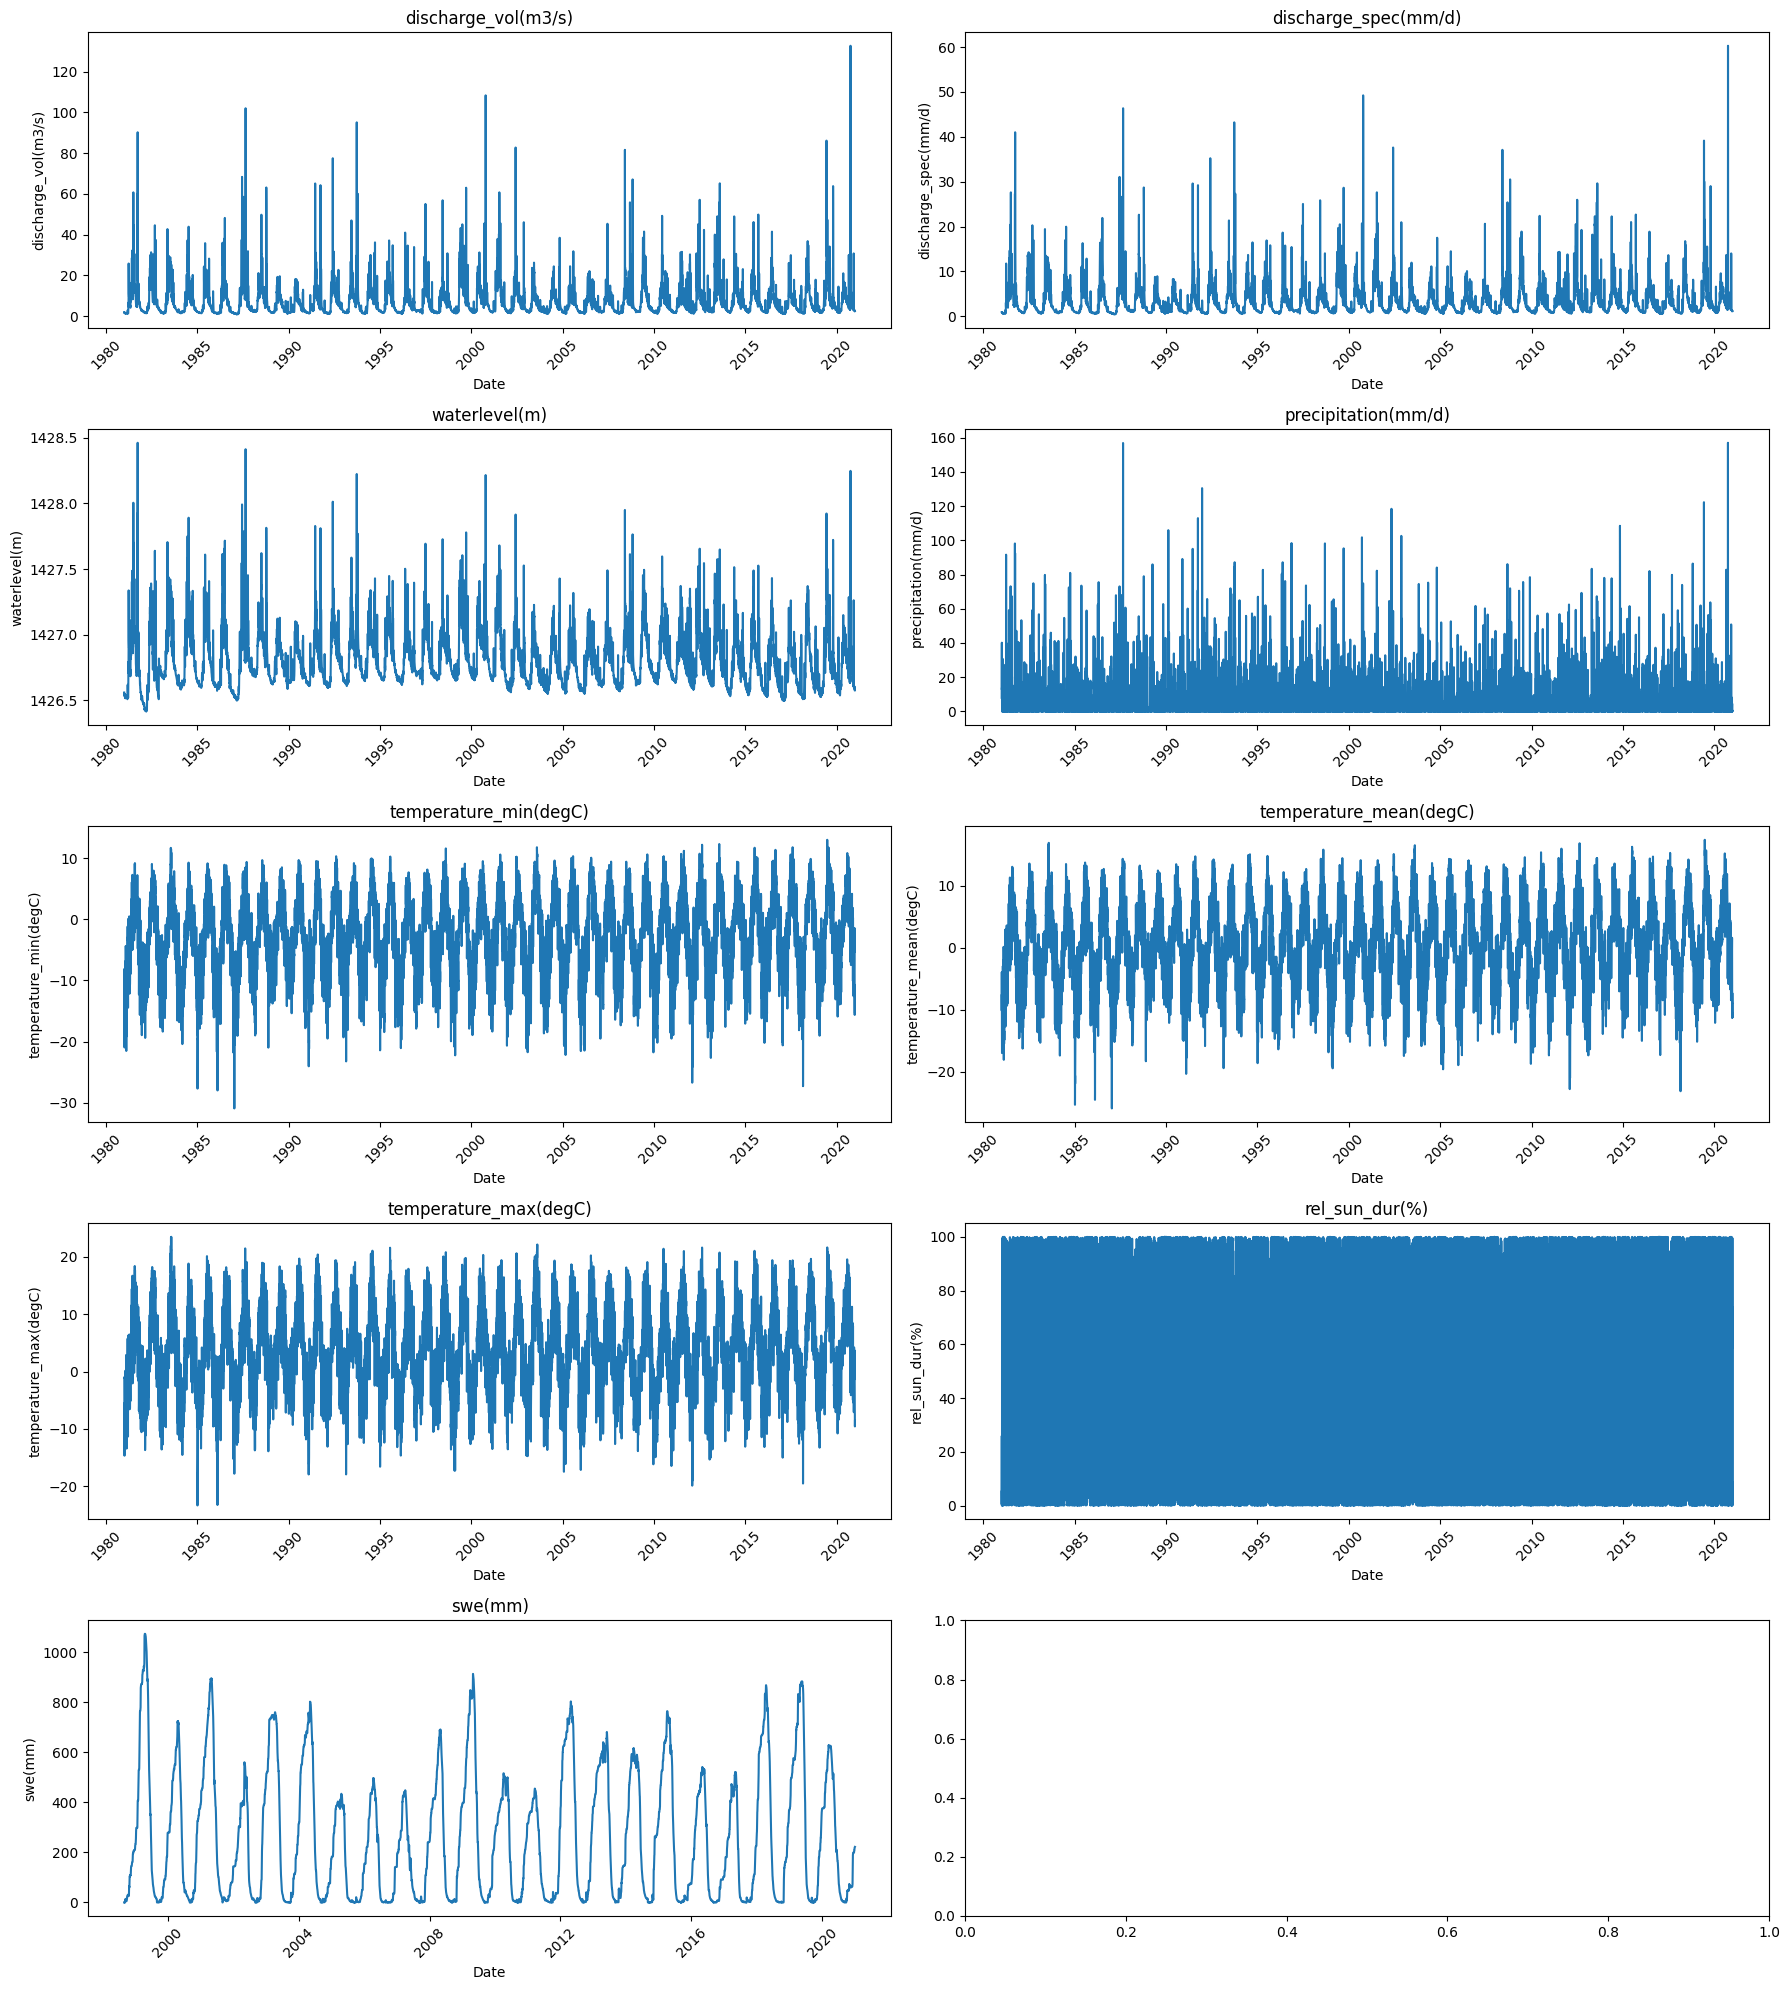

In [8]:
# erste Visualisierung der Daten als Zeitreihe
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(df_observation_andermatt.columns):
    axes[i].plot(df_observation_andermatt.index, df_observation_andermatt[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show();


## Modellierung

In [9]:
# Libraries für Zeitreihenanalyse
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
df_important_coef = df_observation_andermatt[['waterlevel(m)','discharge_vol(m3/s)','temperature_mean(degC)', 'precipitation(mm/d)']]

df_important_coef.to_csv('../data/prediction/df_important_coef.csv')

df_level = df_important_coef['waterlevel(m)']
df_temp = df_important_coef['temperature_mean(degC)']
df_vol = df_important_coef['discharge_vol(m3/s)']
df_rain = df_important_coef['precipitation(mm/d)']

In [ ]:
df_important_coef_diff = df_important_coef.copy()

# 1. Differenzbildung für 'waterlevel(m)'
df_important_coef_diff['waterlevel_diff'] = df_level.diff()

# 2. Differenzbildung für 'discharge_vol(m3/s)'
df_important_coef_diff['discharge_diff'] = df_important_coef_diff['discharge_vol(m3/s)'].diff()

# 3. Differenzbildung für 'precipitation(mm/d)'
df_important_coef_diff['precipitation_diff'] = df_important_coef_diff['precipitation(mm/d)'].diff()

# Erster Wert faellt weg wegen NaN durch diff
df_important_coef_diff.dropna(inplace=True)

# Zweite Differenz auf dem gleichen DataFrame aufbauen
df_important_coef_diff['waterlevel_diff2'] = df_important_coef_diff['waterlevel_diff'].diff()
df_important_coef_diff['discharge_diff2'] = df_important_coef_diff['discharge_diff'].diff()
df_important_coef_diff['precipitation_diff2'] = df_important_coef_diff['precipitation_diff'].diff()


df_important_coef_diff.dropna(inplace=True)

In [12]:
df_important_coef_log = df_important_coef.copy()

df_important_coef_log['waterlevel_log_diff'] = np.log(df_important_coef_log['waterlevel(m)']).diff()
df_important_coef_log['waterlevel_log_diff_2'] = np.log(df_important_coef_log['waterlevel_log_diff']).diff()

df_important_coef_log['precipitation_log_diff'] = np.log(df_important_coef_log['precipitation(mm/d)']).diff()
df_important_coef_log['precipitation_log_diff2'] = np.log(df_important_coef_log['precipitation_log_diff']).diff()


df_important_coef_log['discharge_log_diff'] = np.log(df_important_coef_log['discharge_vol(m3/s)']).diff()
df_important_coef_log['discharge_log_diff_2'] = np.log(df_important_coef_log['discharge_log_diff']).diff()

df_important_coef_log.dropna(inplace=True)

c:\Users\Sandra\Documents\GitHub\spz\spz_Wasserstand_analyse\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sandra\Documents\GitHub\spz\spz_Wasserstand_analyse\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sandra\Documents\GitHub\spz\spz_Wasserstand_analyse\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sandra\Documents\GitHub\spz\spz_Wasserstand_analyse\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sandra\Documents\GitHub\spz\spz_Wasserstand_analyse\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning

### STL - Model

nach dem wir alle diese anpassungen gemacht haben, haben wir erst bemerkt (oder wirklich verstanden), dass der Trend nicht genügend gesmooth ist. Deshalb haben wir anstelle des seasonal_decompose, das den moving average verwendet und wenig direkt Steuerung zulässt, die zerlegung mit STL versucht

In [13]:
from statsmodels.tsa.seasonal import STL

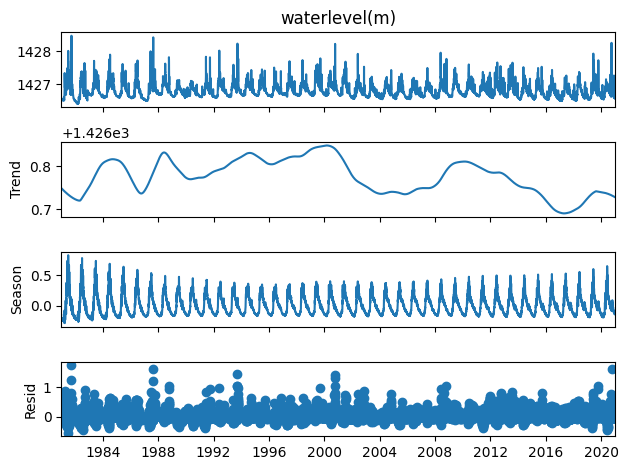

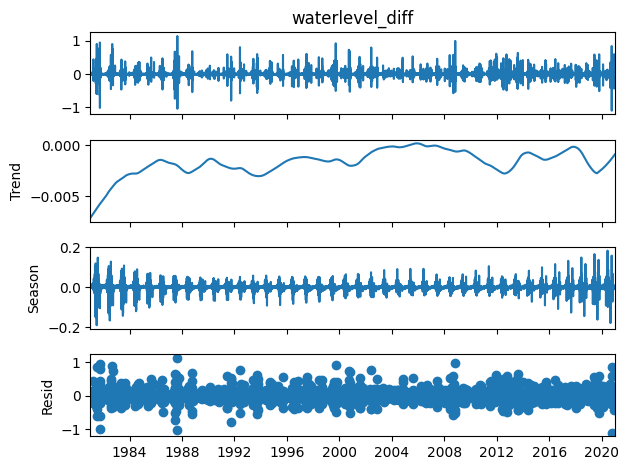

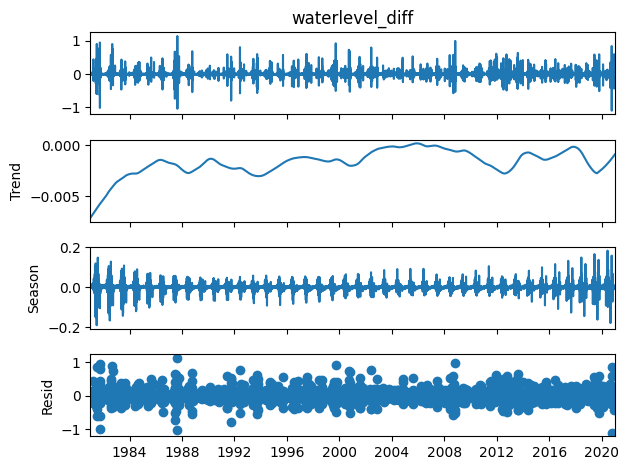

In [ ]:
stl = STL(df_level, period=365, trend=1001, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()

stl = STL(df_important_coef_diff['waterlevel_diff'], period=365, trend=1001, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()

stl = STL(df_important_coef_diff['waterlevel_diff'], period=365, trend=1001, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()


### MSTL - Model

#### Fourrier

Anzahl Datenpunkte: 14610
Zeitraum: 1981-01-01 00:00:00 bis 2020-12-31 00:00:00
Zeitdelta: 1 Tage

FFT berechnet: 7305 Frequenzen


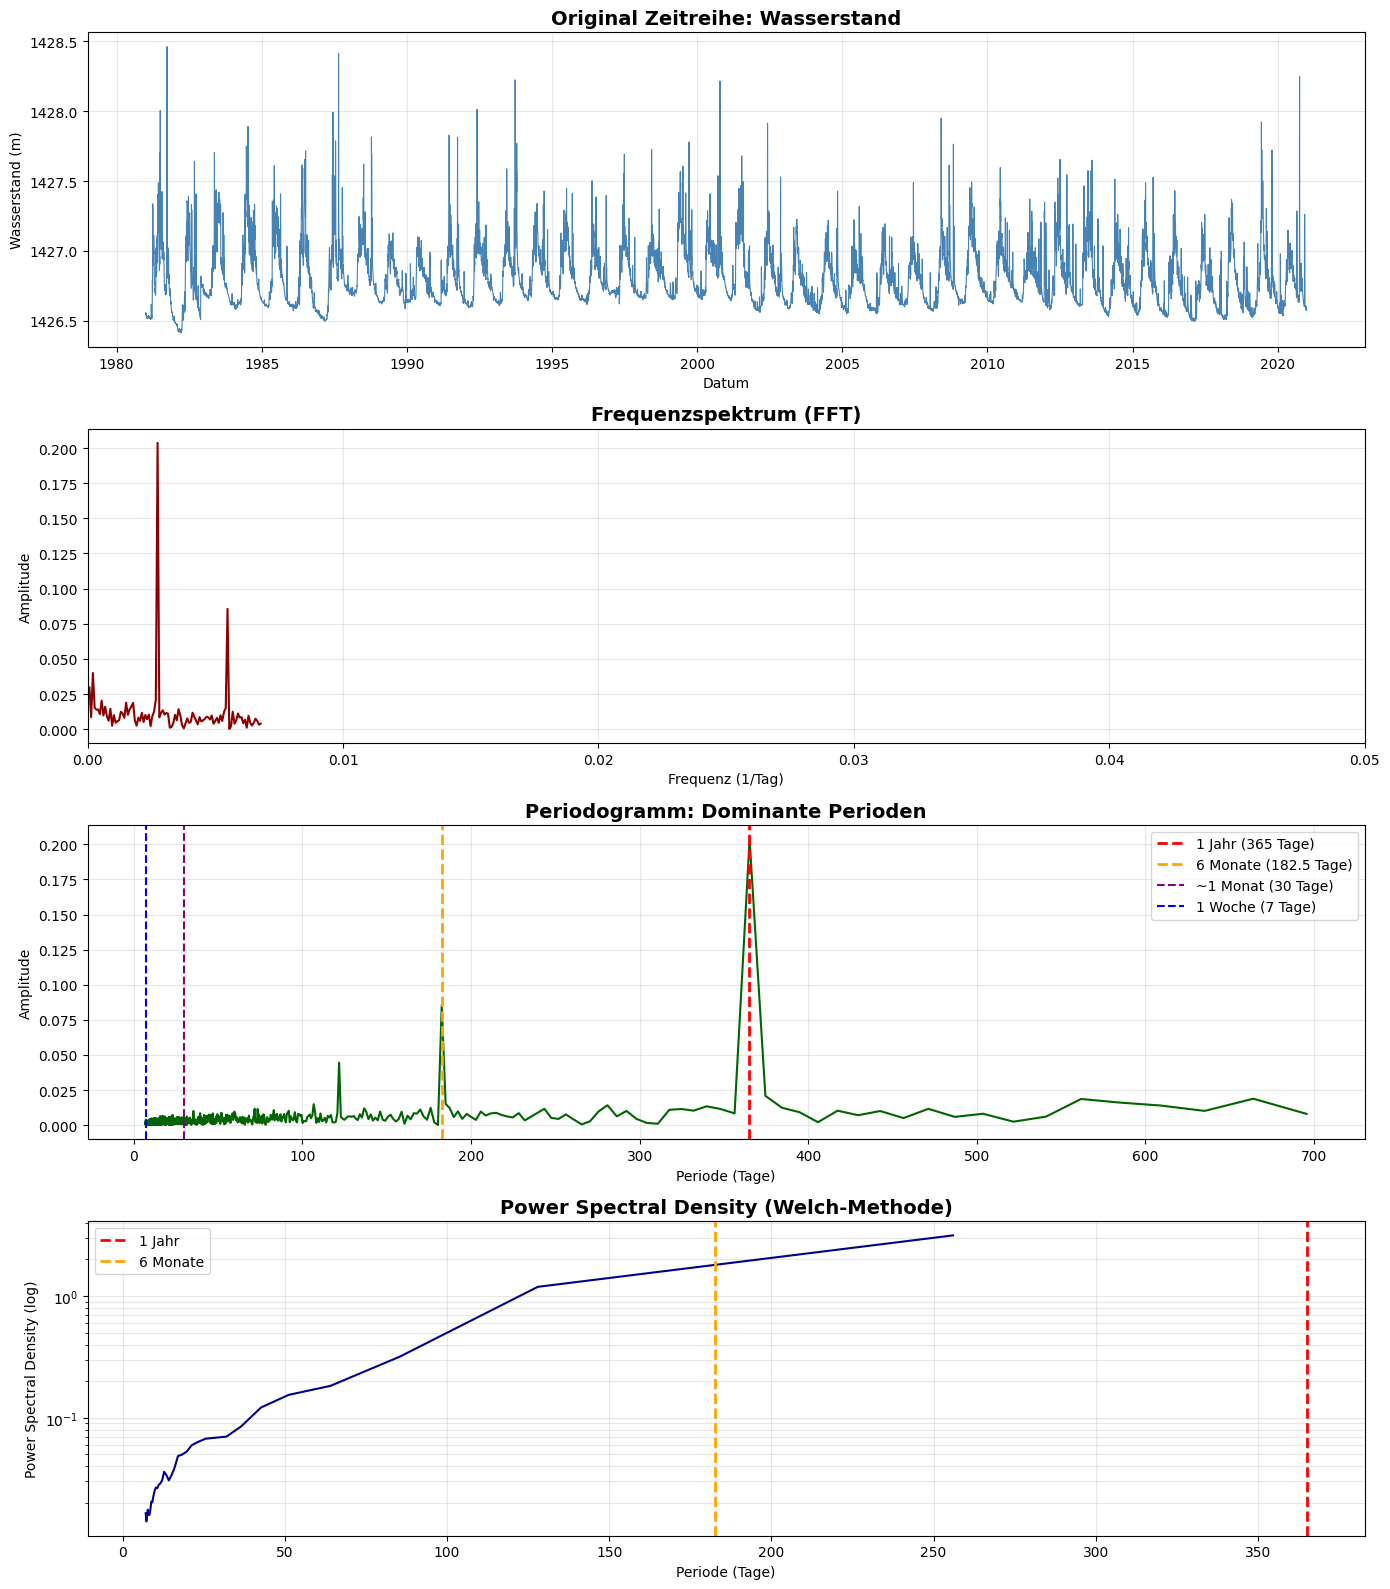


TOP 10 DOMINANTE PERIODEN
Rang   Periode (Tage)     Periode (Jahre)    Amplitude   
------------------------------------------------------------
1            365.25 Tage         1.0000 Jahre     0.203651
2            182.62 Tage         0.5000 Jahre     0.085584
3            121.75 Tage         0.3333 Jahre     0.044568
4           4870.00 Tage        13.3333 Jahre     0.039983
5          14610.00 Tage        40.0000 Jahre     0.029700
6            374.62 Tage         1.0256 Jahre     0.020949
7           1826.25 Tage         5.0000 Jahre     0.020319
8            664.09 Tage         1.8182 Jahre     0.018866
9            561.92 Tage         1.5385 Jahre     0.018687
10           584.40 Tage         1.6000 Jahre     0.016169


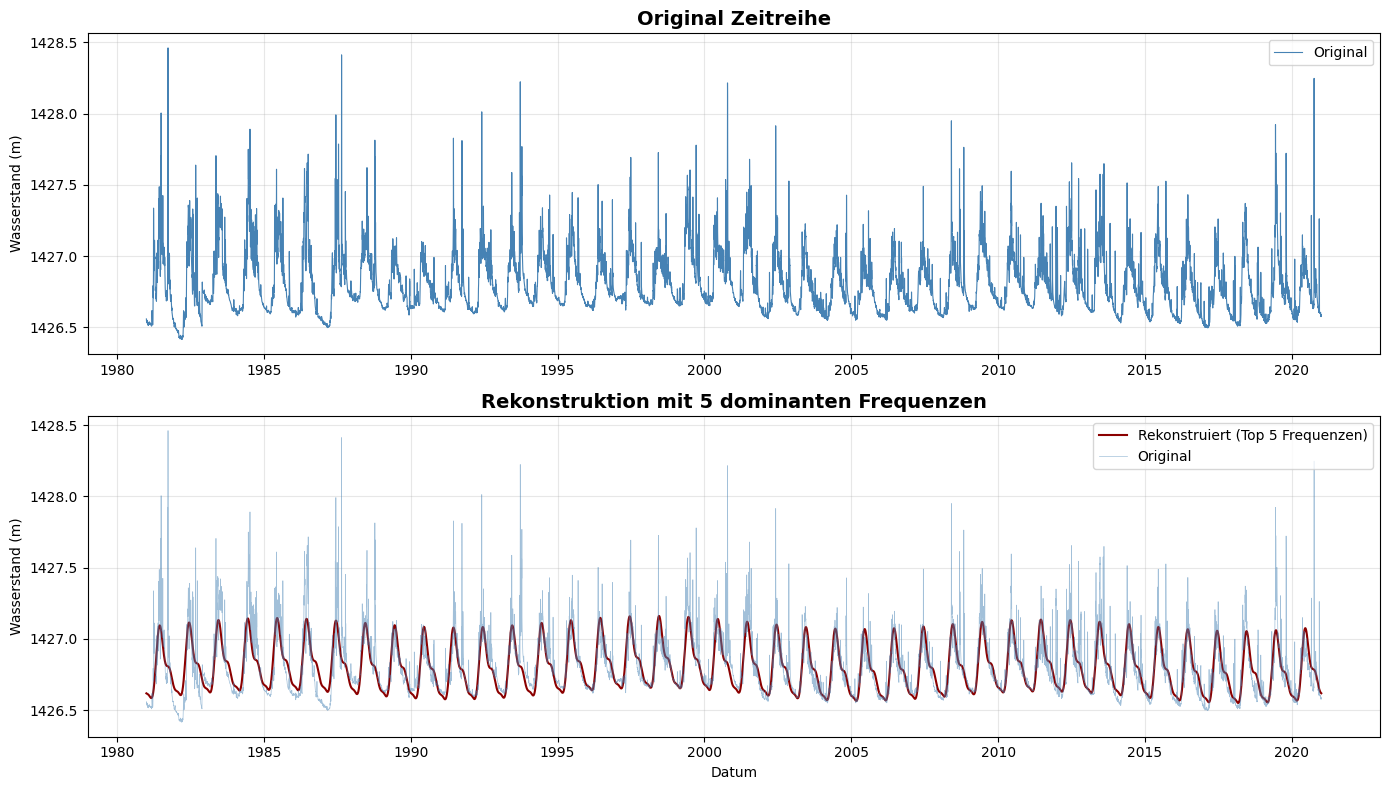


Rekonstruktions-Fehler (RMSE): 0.119800 m

FOURIER-ANALYSE ABGESCHLOSSEN ✓


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq, ifft

# ==========================================
# 1. DATEN VORBEREITEN
# ==========================================

# Wasserstand-Daten extrahieren
waterlevel = df_level.dropna()

print(f"Anzahl Datenpunkte: {len(waterlevel)}")
print(f"Zeitraum: {waterlevel.index[0]} bis {waterlevel.index[-1]}")
print(f"Zeitdelta: {(waterlevel.index[1] - waterlevel.index[0]).days} Tage")

# ==========================================
# 2. FOURIER-TRANSFORMATION (FFT)
# ==========================================

# Zeitreihe in Array umwandeln
y = waterlevel.values
n = len(y)

# Sampling-Frequenz (täglich = 1/Tag)
sampling_rate = 1.0  # 1 Messung pro Tag
dt = 1.0  # Zeitschritt in Tagen

# FFT berechnen
yf = fft(y)
xf = fftfreq(n, dt)

# Nur positive Frequenzen (Symmetrie der FFT)
positive_freqs = xf[:n//2]
positive_fft = 2.0/n * np.abs(yf[:n//2])

# In Periode umrechnen (Tage)
# Frequenz = 1/Periode → Periode = 1/Frequenz
periods = 1 / positive_freqs[1:]  # Index 0 überspringen (DC-Komponente)
magnitudes = positive_fft[1:]

print(f"\nFFT berechnet: {len(positive_freqs)} Frequenzen")

# ==========================================
# 3. POWER SPECTRAL DENSITY (PSD)
# ==========================================

# Alternative: Welch-Methode für glatteres Spektrum
frequencies, psd = signal.welch(y, fs=sampling_rate, nperseg=min(256, n//4))

# In Perioden umrechnen
periods_welch = 1 / frequencies[1:]
psd_welch = psd[1:]

# ==========================================
# 4. VISUALISIERUNG
# ==========================================

fig, axes = plt.subplots(4, 1, figsize=(14, 16))

# Plot 1: Original Zeitreihe
axes[0].plot(waterlevel.index, waterlevel, linewidth=0.8, color='steelblue')
axes[0].set_title('Original Zeitreihe: Wasserstand', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Datum')
axes[0].set_ylabel('Wasserstand (m)')
axes[0].grid(True, alpha=0.3)

# Plot 2: Frequenzspektrum (FFT)
axes[1].plot(positive_freqs[1:100], positive_fft[1:100], linewidth=1.5, color='darkred')
axes[1].set_title('Frequenzspektrum (FFT)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frequenz (1/Tag)')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 0.05)  # Fokus auf niedrige Frequenzen

# Plot 3: Periodogramm (Perioden in Tagen)
# Fokus auf relevante Perioden (7 Tage bis 730 Tage = 2 Jahre)
mask = (periods >= 7) & (periods <= 730)
axes[2].plot(periods[mask], magnitudes[mask], linewidth=1.5, color='darkgreen')
axes[2].set_title('Periodogramm: Dominante Perioden', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Periode (Tage)')
axes[2].set_ylabel('Amplitude')
axes[2].grid(True, alpha=0.3)

# Markiere wichtige Perioden
axes[2].axvline(x=365, color='red', linestyle='--', linewidth=2, label='1 Jahr (365 Tage)')
axes[2].axvline(x=182.5, color='orange', linestyle='--', linewidth=2, label='6 Monate (182.5 Tage)')
axes[2].axvline(x=30, color='purple', linestyle='--', linewidth=1.5, label='~1 Monat (30 Tage)')
axes[2].axvline(x=7, color='blue', linestyle='--', linewidth=1.5, label='1 Woche (7 Tage)')
axes[2].legend()

# Plot 4: Power Spectral Density (Welch)
mask_welch = (periods_welch >= 7) & (periods_welch <= 730)
axes[3].semilogy(periods_welch[mask_welch], psd_welch[mask_welch], linewidth=1.5, color='darkblue')
axes[3].set_title('Power Spectral Density (Welch-Methode)', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Periode (Tage)')
axes[3].set_ylabel('Power Spectral Density (log)')
axes[3].grid(True, alpha=0.3, which='both')

# Markiere wichtige Perioden
axes[3].axvline(x=365, color='red', linestyle='--', linewidth=2, label='1 Jahr')
axes[3].axvline(x=182.5, color='orange', linestyle='--', linewidth=2, label='6 Monate')
axes[3].legend()

plt.tight_layout()
plt.show()

# ==========================================
# 5. DOMINANTE FREQUENZEN IDENTIFIZIEREN
# ==========================================

# Finde die Top 10 dominanten Perioden
top_n = 10
top_indices = np.argsort(magnitudes)[-top_n:][::-1]
top_periods = periods[top_indices]
top_magnitudes = magnitudes[top_indices]

print(f"\n{'='*60}")
print(f"TOP {top_n} DOMINANTE PERIODEN")
print(f"{'='*60}")
print(f"{'Rang':<6} {'Periode (Tage)':<18} {'Periode (Jahre)':<18} {'Amplitude':<12}")
print(f"{'-'*60}")

for i, (period, magnitude) in enumerate(zip(top_periods, top_magnitudes), 1):
    years = period / 365.25
    print(f"{i:<6} {period:>12.2f} Tage   {years:>12.4f} Jahre   {magnitude:>10.6f}")

# ==========================================
# 6. REKONSTRUKTION MIT DOMINANTEN FREQUENZEN
# ==========================================

# Rekonstruiere Signal mit nur den dominantesten Frequenzen
n_components = 5  # Anzahl der zu behaltenden Komponenten

# Alle Frequenzen außer Top-N auf 0 setzen
yf_filtered = yf.copy()
all_indices = np.argsort(np.abs(yf))
yf_filtered[all_indices[:-n_components*2]] = 0  # *2 wegen Symmetrie

# Inverse FFT
y_reconstructed = ifft(yf_filtered).real

# Visualisierung: Original vs. Rekonstruiert
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Original
axes[0].plot(waterlevel.index, waterlevel, linewidth=0.8, color='steelblue', label='Original')
axes[0].set_title(f'Original Zeitreihe', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Wasserstand (m)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Rekonstruiert mit Top-N Frequenzen
axes[1].plot(waterlevel.index, y_reconstructed, linewidth=1.5, color='darkred', 
             label=f'Rekonstruiert (Top {n_components} Frequenzen)')
axes[1].plot(waterlevel.index, waterlevel, linewidth=0.5, color='steelblue', 
             alpha=0.5, label='Original')
axes[1].set_title(f'Rekonstruktion mit {n_components} dominanten Frequenzen', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Datum')
axes[1].set_ylabel('Wasserstand (m)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Fehler berechnen
mse = np.mean((y - y_reconstructed)**2)
rmse = np.sqrt(mse)
print(f"\nRekonstruktions-Fehler (RMSE): {rmse:.6f} m")


print(f"\n{'='*60}")
print("FOURIER-ANALYSE ABGESCHLOSSEN ✓")
print(f"{'='*60}")

In [16]:
from statsmodels.tsa.seasonal import MSTL


MSTL: Jaehrlich mit windows=[549]


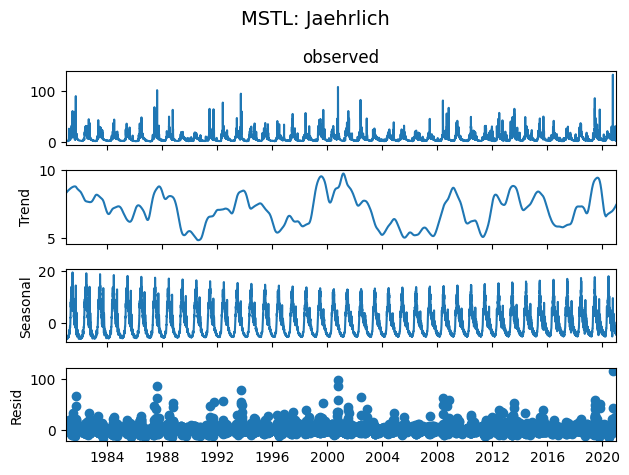

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Halbjaehrlich + Jaehrlich mit windows=[273, 549]


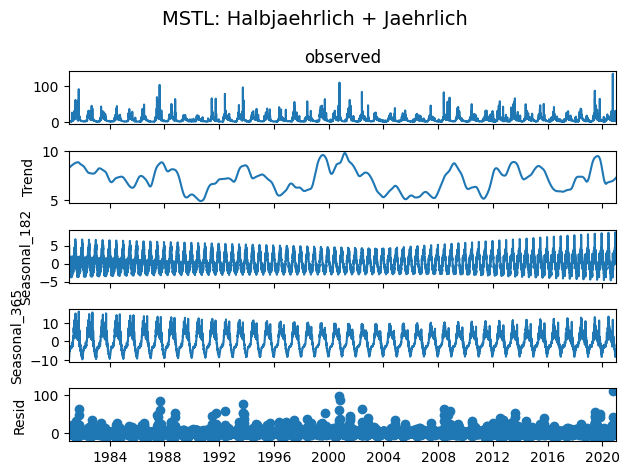

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Dritteljaehrlich + Halbjaehrlich + Jaehrlich mit windows=[183, 273, 549]


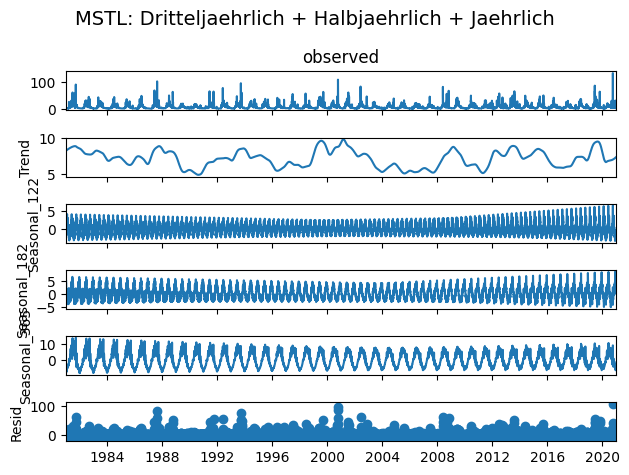

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Jaehrlich + Langfristig (ca. 13 Jahre) mit windows=[549, 7305]


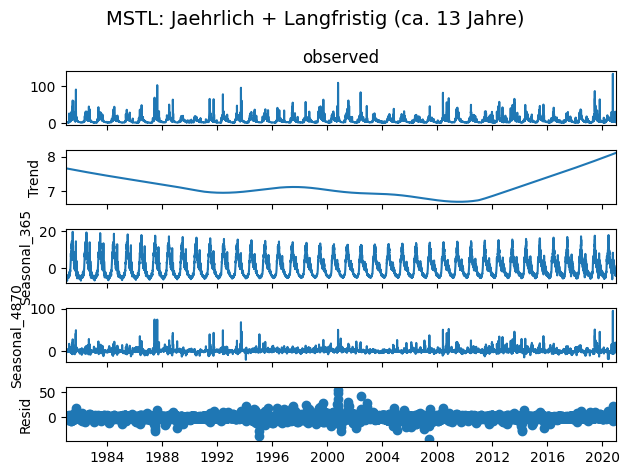

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Jaehrlich + 13 Jahre + 40 Jahre mit windows=[549, 7305, 21915]


c:\Users\Sandra\Documents\GitHub\spz\spz_Wasserstand_analyse\.venv\Lib\site-packages\statsmodels\tsa\stl\mstl.py:218: UserWarning: A period(s) is larger than half the length of time series. Removing these period(s).
  warnings.warn(


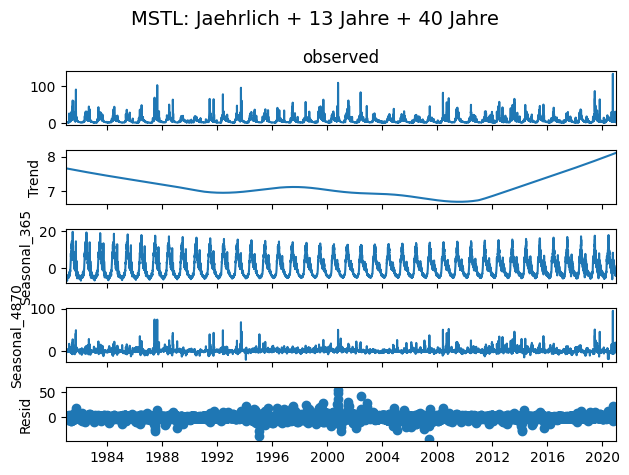

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer


In [17]:
# Top 5 Perioden (Tage) aus Fourier-Analyse
top_periods = [365.25, 182.62, 121.75, 4870.00, 14610.00]

# Konfigurationen mit verschiedenen Kombinationen der Top Perioden (ganzzahlige Rundung)
configs = [
    {'periods': [365], 'desc': 'Jaehrlich'},
    {'periods': [182, 365], 'desc': 'Halbjaehrlich + Jaehrlich'},
    {'periods': [122, 182, 365], 'desc': 'Dritteljaehrlich + Halbjaehrlich + Jaehrlich'},
    {'periods': [365, 4870], 'desc': 'Jaehrlich + Langfristig (ca. 13 Jahre)'},
    {'periods': [365, 4870, 14610], 'desc': 'Jaehrlich + 13 Jahre + 40 Jahre'}
]

def make_odd_integer(n):
    """Gibt die nächstgrössere ungerade ganze Zahl >=3 zurück."""
    n = int(np.round(n))
    if n < 3:
        return 3
    if n % 2 == 0:
        return n + 1
    return n

for config in configs:
    # Berechnung windows als 1.5 * Periode (ungerade integer)
    windows = [make_odd_integer(1.5 * p) for p in config['periods']]

    print(f"\n{'='*50}")
    print(f"MSTL: {config['desc']} mit windows={windows}")
    print(f"{'='*50}")
    
    mstl = MSTL(
        df_important_coef['discharge_vol(m3/s)'],
        periods=config['periods'],
        windows=windows
    )
    result = mstl.fit()
    
    # Plot
    result.plot()
    plt.suptitle(f"MSTL: {config['desc']}", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # ADF-Test Residuen
    adf_result = adfuller(result.resid.dropna())
    print(f"ADF p-Wert Residuen: {adf_result[1]:.6f}")
    
    if adf_result[1] < 0.05:
        print("✓ Residuen sind stationaer")
    else:
        print("✗ Residuen nicht stationaer")



MSTL: Jaehrlich


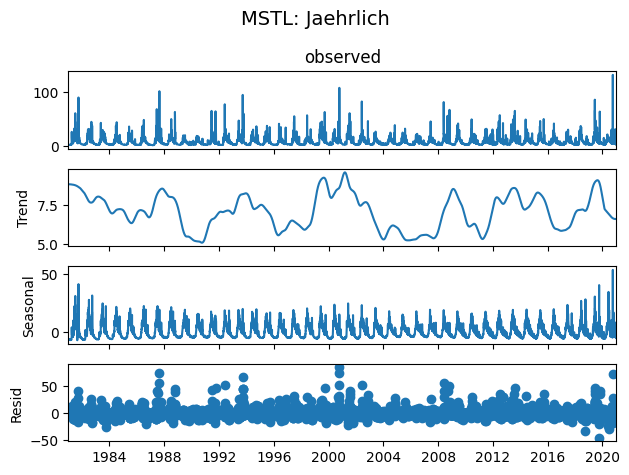

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Halbjaehrlich + Jaehrlich


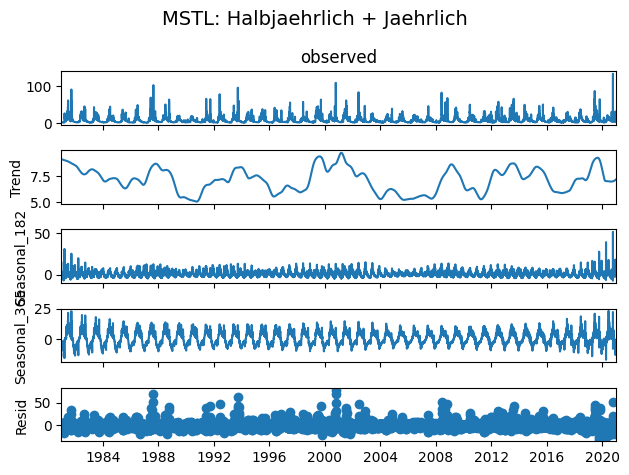

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Dritteljaehrlich + Halbjaehrlich + Jaehrlich


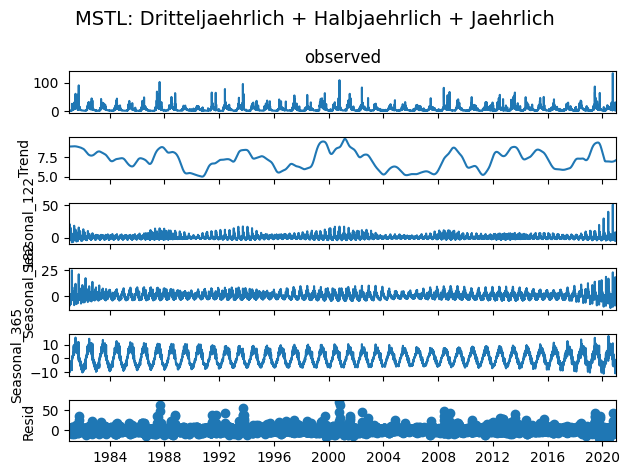

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Jaehrlich + Langfristig (ca. 13 Jahre)


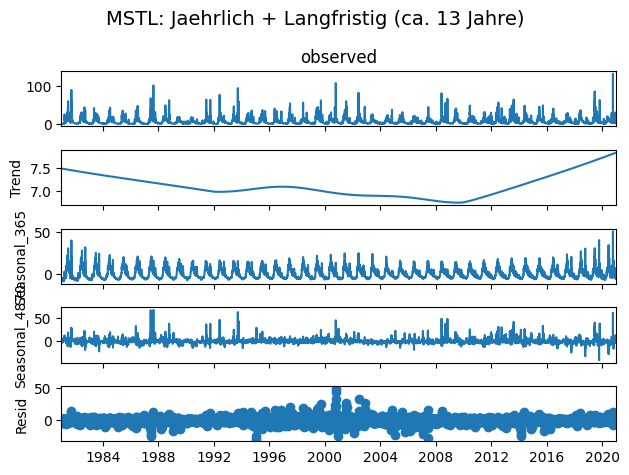

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer

MSTL: Jaehrlich + 13 Jahre + 40 Jahre


c:\Users\Sandra\Documents\GitHub\spz\spz_Wasserstand_analyse\.venv\Lib\site-packages\statsmodels\tsa\stl\mstl.py:218: UserWarning: A period(s) is larger than half the length of time series. Removing these period(s).
  warnings.warn(


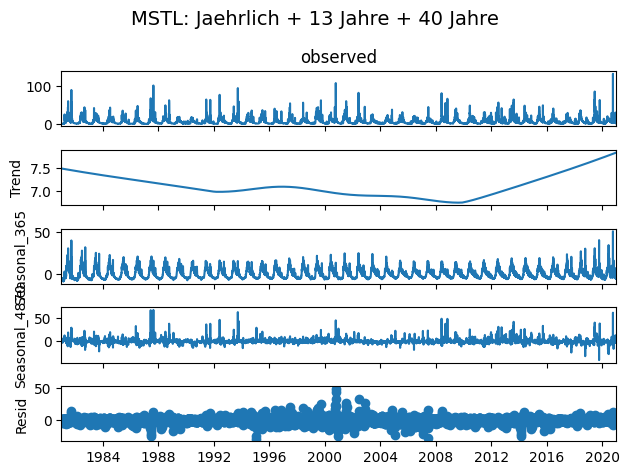

ADF p-Wert Residuen: 0.000000
✓ Residuen sind stationaer


In [18]:
# Top 5 Perioden (Tage) aus Fourier-Analyse
top_periods = [365.25, 182.62, 121.75, 4870.00, 14610.00]

# Konfigurationen mit verschiedenen Kombinationen der Top Perioden (gerundet auf ganze Tage)
configs = [
    {'periods': [365], 'desc': 'Jaehrlich'},
    {'periods': [182, 365], 'desc': 'Halbjaehrlich + Jaehrlich'},
    {'periods': [122, 182, 365], 'desc': 'Dritteljaehrlich + Halbjaehrlich + Jaehrlich'},
    {'periods': [365, 4870], 'desc': 'Jaehrlich + Langfristig (ca. 13 Jahre)'},
    {'periods': [365, 4870, 14610], 'desc': 'Jaehrlich + 13 Jahre + 40 Jahre'}
]

for config in configs:
    print(f"\n{'='*50}")
    print(f"MSTL: {config['desc']}")
    print(f"{'='*50}")
    
    mstl = MSTL(
        # df_important_coef['waterlevel(m)'],
        df_important_coef['discharge_vol(m3/s)'],
        periods=config['periods'],
        windows=None
    )
    result = mstl.fit()
    
    # Ergebnis plotten
    result.plot()
    plt.suptitle(f"MSTL: {config['desc']}", fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # ADF-Test der Residuen auf Stationarität
    adf_result = adfuller(result.resid.dropna())
    print(f"ADF p-Wert Residuen: {adf_result[1]:.6f}")
    
    if adf_result[1] < 0.05:
        print("✓ Residuen sind stationaer")
    else:
        print("✗ Residuen nicht stationaer")

### Seasonal decompose

In [27]:

def export_decompose_to_csv(decomp_result, filename):
    df = pd.DataFrame({
        'trend': decomp_result.trend,
        'seasonal': decomp_result.seasonal,
        'resid': decomp_result.resid
    })
    df.to_csv(filename)


In [28]:
# Zerlegung in Komponenten
df_vol_comp = seasonal_decompose(df_vol, model='additive', period=365)    # model : {"additive", "multiplicative"}, optional
df_temp_comp = seasonal_decompose(df_temp, model='additive', period=365)
df_level_comp = seasonal_decompose(df_level, model='additive', period=365)

In [26]:
df_vol_comp

In [29]:
export_decompose_to_csv(df_vol_comp, '../data/prediction/prediction_discharge_vol.csv')
export_decompose_to_csv(df_temp_comp, '../data/prediction/prediction_temperature_mean.csv')
export_decompose_to_csv(df_level_comp, '../data/prediction/prediction_waterlevel.csv')

KeyboardInterrupt: 

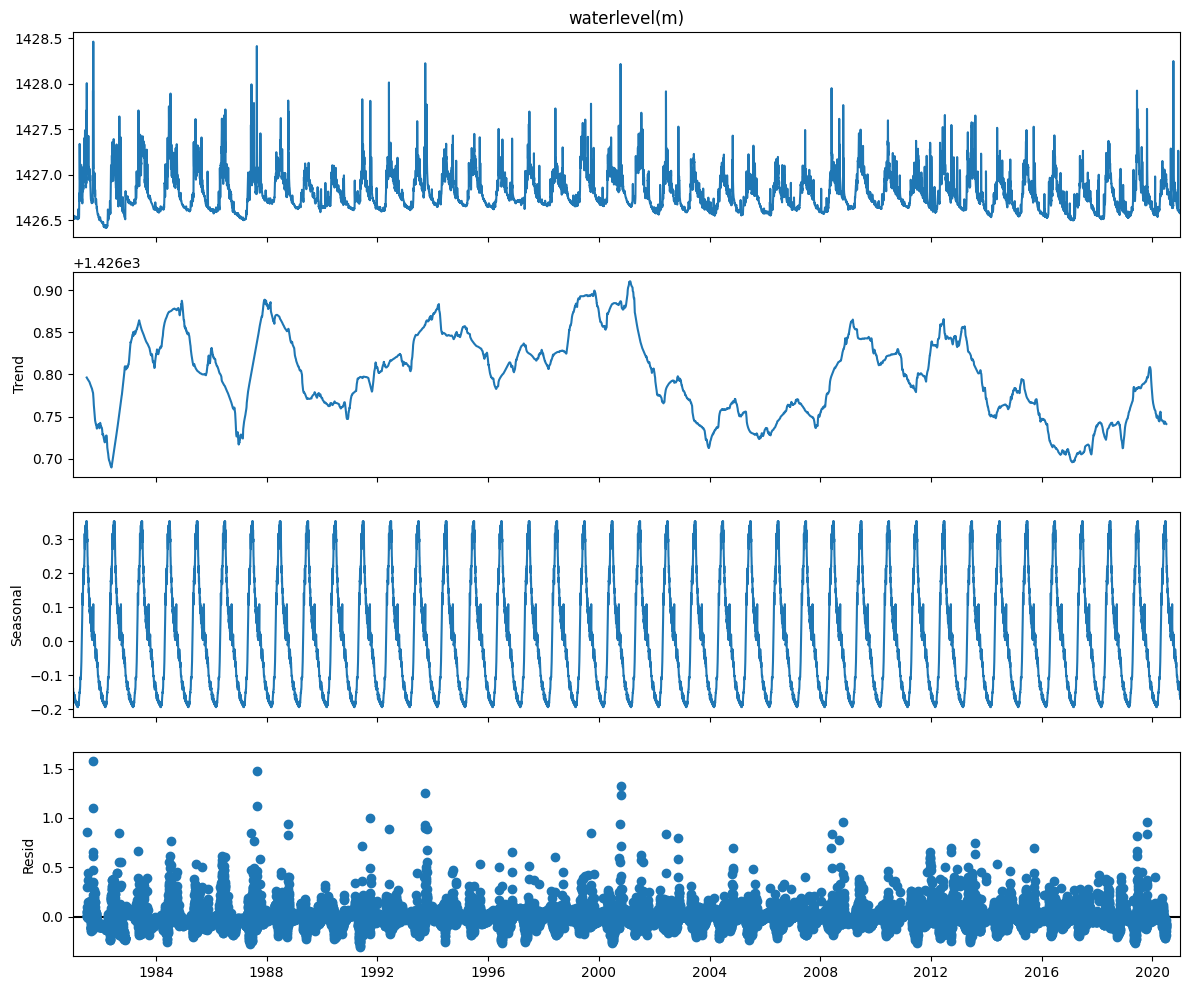

In [ ]:
# 1. Zerlegung
fig=df_level_comp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
level_trend = df_level_comp.trend
level_trend = level_trend[level_trend.notnull()]

level_resid = df_level_comp.resid
level_redid = level_resid[level_resid.notnull()]

level_seasonal = df_level_comp.seasonal
level_seasonal = level_seasonal[level_seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
# r = adfuller(df_vol_comp.observed, maxlag=12)
r = adfuller(df_level_comp.observed, maxlag=365)

print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')

r = adfuller(level_trend, maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')

r = adfuller(level_resid.dropna(), maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')



p-Wert ganze Zeitreihe: 0.000000
p-Wert Trend: 0.004467
p-Wert Residuen: 0.000000


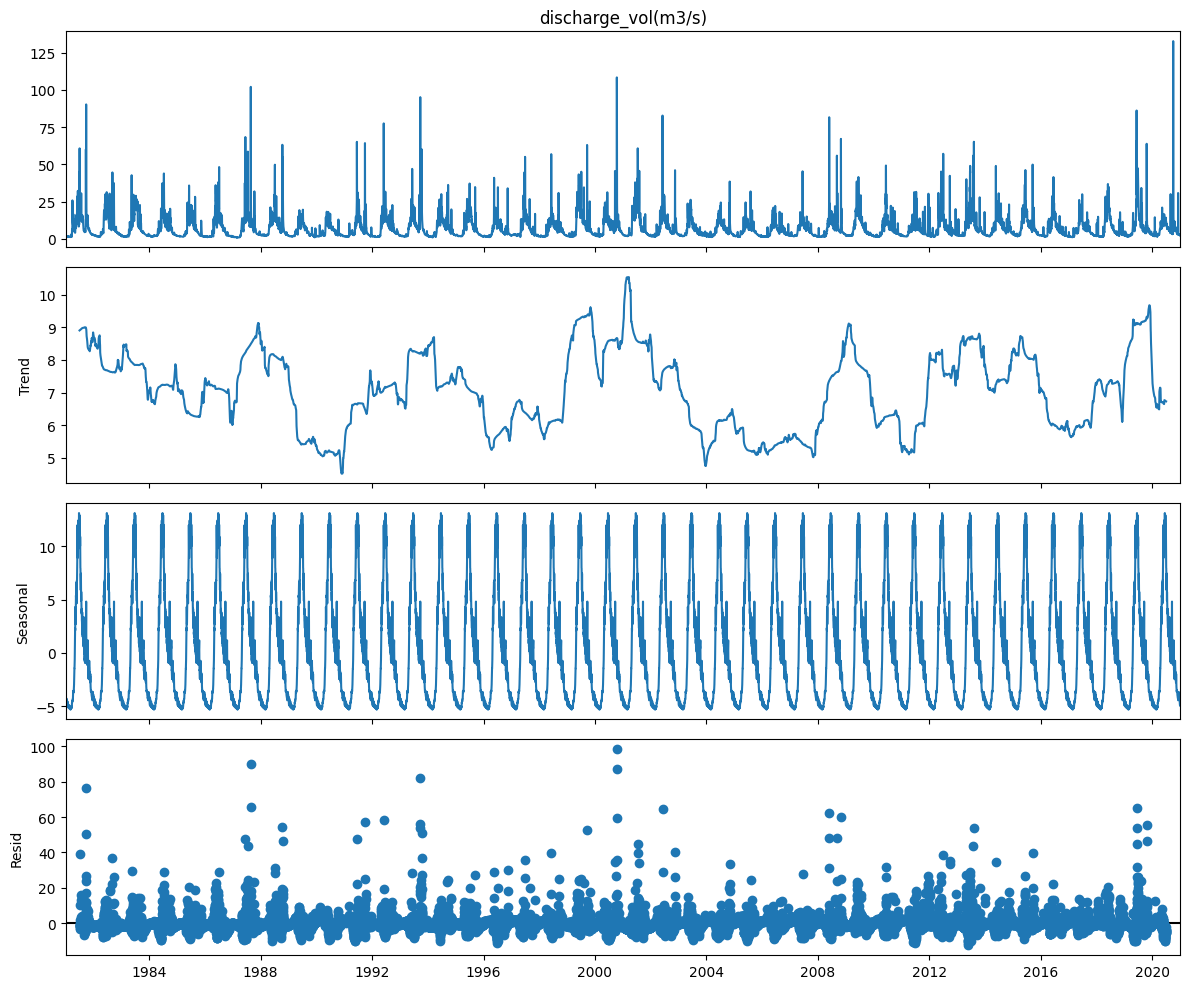

In [ ]:
# 1. Zerlegung
fig=df_vol_comp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
vol_trend = df_vol_comp.trend
vol_trend = vol_trend[vol_trend.notnull()]

vol_resid = df_vol_comp.resid
vol_redid = vol_resid[vol_resid.notnull()]

vol_seasonal = df_vol_comp.seasonal
vol_seasonal = vol_seasonal[vol_seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
# r = adfuller(df_vol_comp.observed, maxlag=12)
r = adfuller(df_vol_comp.observed, maxlag=365)

print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')

r = adfuller(vol_trend, maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')

r = adfuller(vol_resid.dropna(), maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')

p-Wert ganze Zeitreihe: 0.000000
p-Wert Residuen: 0.000000
p-Wert Trend: 0.009578


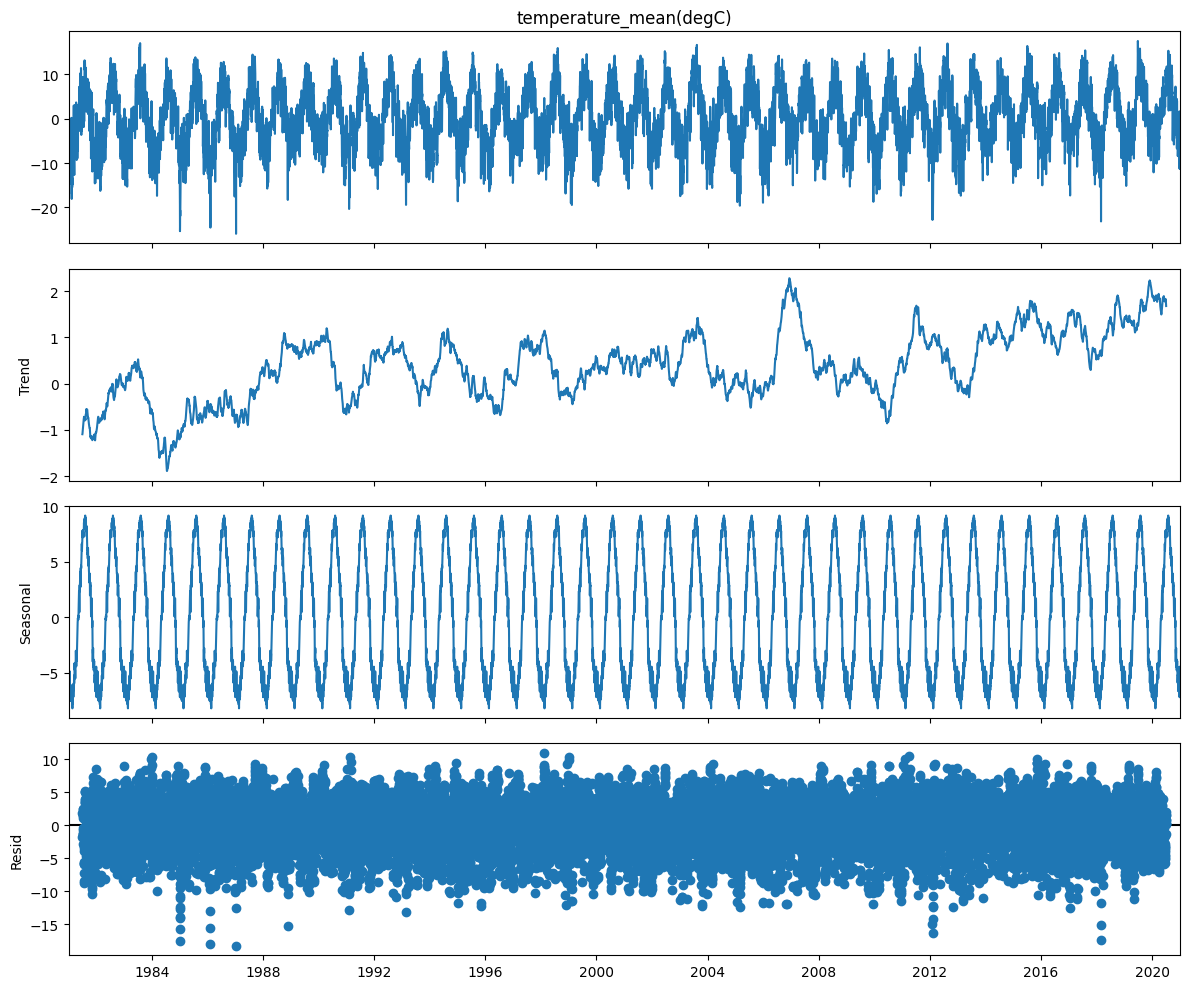

In [ ]:
# 1. Zerlegung
fig=df_temp_comp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
temp_trend = df_temp_comp.trend
temp_trend = temp_trend[temp_trend.notnull()]

temp_resid = df_temp_comp.resid
temp_resid = temp_resid[temp_resid.notnull()]

temp_seasonal = df_temp_comp.seasonal
temp_seasonal = temp_seasonal[temp_seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
r=adfuller(df_temp_comp.observed,maxlag=12)

print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')

r=adfuller(temp_resid ,maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')

r=adfuller(temp_trend ,maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')